In [35]:
import pandas as pd
import os

In [36]:
## concat seperate CSV files together
df = pd.read_csv('../dataset/train.csv', low_memory=False)

In [37]:
#look at the name of the colums in the dataset
df.columns
#can remove id, listing_url and scrape_id, and anything else ending with suffix _url can also remove has availability, availability 60/90/365 as only interested in 30

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=107)

In [38]:
df.iloc[:,~(df.columns == 'id')
           & ~(df.columns.str.endswith('_url'))
           & ~(df.columns.str.endswith('_id'))
           & ~(df.columns.isin(['has_availability',
                                'availability_60',
                                'availability_90',
                                'availability_365']))] \
  .columns

Index(['Unnamed: 0', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_in

In [39]:
#location data
df[['street', 'neighbourhood', 'neighbourhood_cleansed',
    'city', 'state', 'zipcode','market', 'smart_location',
    'country_code', 'country', 'latitude', 'longitude', 'is_location_exact']]
#observations
# all will be in the city of rio de janeiro so many of these columns are not necessary.
# neighbourhood_cleansed seems the most appropriate to use. could also use lat/long

,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Rio de Janeiro, Rio de Janeiro, Brazil",Flamengo,Catete,Rio de Janeiro,Rio de Janeiro,222220-030,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.929471,-43.177323,t
1,"São Conrado, Rio de Janeiro, Brazil",São Conrado,São Conrado,São Conrado,Rio de Janeiro,22610,Rio De Janeiro,"São Conrado, Brazil",BR,Brazil,-22.997590,-43.258640,f
2,"Rio de Janeiro, Rio de Janeiro, Brazil",Barra da Tijuca,Jacarepaguá,Rio de Janeiro,Rio de Janeiro,22775-046,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.971411,-43.381882,t
3,"Rio de Janeiro, RJ, Brazil",Tijuca,Tijuca,Rio de Janeiro,RJ,29271-030,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.920974,-43.225367,f
4,"Rio de Janeiro, Rio de Janeiro, Brazil",Glória,Glória,Rio de Janeiro,Rio de Janeiro,20241-150,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.919760,-43.179130,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721764,"Rio de Janeiro, Rio de Janeiro, Brazil",Botafogo,Botafogo,Rio de Janeiro,Rio de Janeiro,22281-080,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.958590,-43.195690,t
721765,"Rio de Janeiro, Rio de Janeiro, Brazil",Gávea,Gávea,Rio de Janeiro,Rio de Janeiro,22451-040,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.976440,-43.231030,t
721766,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,Santíssimo,Rio de Janeiro,Rio de Janeiro,NaN,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.871611,-43.519995,f
721767,"Rio de Janeiro, Rio de Janeiro, Brazil",Gávea,Gávea,Rio de Janeiro,Rio de Janeiro,22470-110,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.972669,-43.228629,t


In [40]:
#closer look at lat/long
df[['latitude', 'longitude']].describe()
## normalize?

,latitude,longitude
count,721768.000000,721768.000000
mean,-22.965249,-43.252215
std,0.045546,1.378558
min,-23.073400,-43.738920
25%,-22.984670,-43.322550
50%,-22.970629,-43.200050
75%,-22.945900,-43.186908
max,2.000000,1125.000000


In [41]:
# does street column contain more info than neighbourhood?
df.loc[~(df['street'].str.split(',',n=1) == df['neighbourhood_cleansed'])
       ][['street','neighbourhood_cleansed']].drop_duplicates()
# yes

,street,neighbourhood_cleansed
0,"Rio de Janeiro, Rio de Janeiro, Brazil",Catete
1,"São Conrado, Rio de Janeiro, Brazil",São Conrado
2,"Rio de Janeiro, Rio de Janeiro, Brazil",Jacarepaguá
3,"Rio de Janeiro, RJ, Brazil",Tijuca
4,"Rio de Janeiro, Rio de Janeiro, Brazil",Glória
...,...,...
702287,"Ipanema, State of Rio de Janeiro, Brazil",Copacabana
709976,"Rio de Janeiro, RJ, Brazil",Benfica
712121,"Mangueira, Rio de Janeiro, Brazil",São Francisco Xavier
713165,"Rio De Janeiro, RJ, Brazil",Barra de Guaratiba


In [42]:
df['street'].str.lower().str.strip().str.split(',', expand=True)[0].describe()
#over half the streets are just the name of the city.

count             721767
unique               440
top       rio de janeiro
freq              441803
Name: 0, dtype: object

In [43]:
# compare with neighbourhoods
df['neighbourhood_cleansed'].describe()
#seems more appropriate to use

count         721768
unique           160
top       Copacabana
freq          179807
Name: neighbourhood_cleansed, dtype: object

In [11]:
df['last_scraped']
# use this column as the month

0        2019-06-20
1        2019-06-20
2        2019-06-20
3        2019-06-20
4        2019-06-20
            ...    
38870    2018-07-14
38871    2018-07-14
38872    2018-07-14
38873    2018-07-14
38874    2018-07-14
Name: last_scraped, Length: 902210, dtype: object

In [14]:
df[['name', 'summary', 'space', 'description',
    'experiences_offered', 'neighborhood_overview',
    'notes', 'transit', 'access', 'interaction',
    'house_rules']].dropna().head(5)
#these columns are all free text

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules
1,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...
4,COPACABANA SEA BREEZE - RIO,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,Our guests no need to worry about breakfast a...,There are convenient public transportantion li...,Our guests have quick access to the beach and ...,We are available whenever the guest needs help...,"Pede-se carteira de identidade, CPF e comprova..."
6,"Beach Block 6bed Penthouse, Ipanema Best Locat...","Sunny terrace with side ocean view, 6 ensuite ...",••• WHY AND HOW WE DIFFER ••• Our guest loves ...,"Sunny terrace with side ocean view, 6 ensuite ...",none,"Located right on Ipanema Beach, Posto 9, only ...",The apartment is on the 5th floor. The elevato...,The beach is a few steps away. Bus stop and ta...,"Entire private unit, 6 bedrooms and terrace. N...",Our apartments can be fully serviced if guests...,CHECK-IN / CHECK-OUT INFORMATION o\tThe flexib...
7,Rio de Janeiro Copacabana Ipanema,"Apartamento tem três dormitórios, dois banheir...",Excelente acomodação perto da praia mais famos...,"Apartamento tem três dormitórios, dois banheir...",none,"Amo a paisagem, arvores a proximidade da praia...","O amnbiente é muito agradável, excelente local...","Sim vários, metros e ônibus na porta. Do Aerop...","Os hospedes tem acesso a lavanderia, cozinha p...",Sou muito extrovertida gosto de uma boa conver...,"Com gentileza, educação respeito mas sentindo-..."
11,Beach Block 3Bed ensuite in Ipanema Best Locat...,Our guests love staying with us! We have hoste...,DETAILS: No elevator in the building. Recentl...,Our guests love staying with us! We have hoste...,none,"Right by the famous ""Posto 9"", the building is...",The apartment is located on the 4th floor.,"The apartment is located on the beach block, e...","Entire private unit, for the guest's sole use....",Our apartments can be fully serviced if guests...,CHECK-IN / CHECK-OUT INFORMATION o\tThe flexib...


In [44]:
#host columns
df[['host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']].head(5)
#obsv
#host_about is free text
#if i want to use host_verifications seperate?

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,Luciano,2015-01-21,BR,NaN,within a day,50%,NaN,f,Flamengo,2.0,2.0,['phone'],t,f
1,Marcella,2014-07-25,"Rio de Janeiro, Rio de Janeiro, Brazil","Olá, sou nova nessa comunidade como anfitriã (...",within a day,100%,NaN,f,São Conrado,2.0,2.0,"['email', 'phone', 'offline_government_id', 's...",t,f
2,Cruz Imóveis,2016-06-13,"Rio de Janeiro, State of Rio de Janeiro, Brazil",A CRUZ IMÓVEIS RJ é uma empresa localizada no ...,NaN,NaN,NaN,f,Barra da Tijuca,12.0,12.0,"['email', 'phone']",t,f
3,Ana Paula,2016-02-18,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Tenho 41 anos, mãe e analista de projetos. Bem...",NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'facebook']",t,f
4,Renata E Thiago,2016-03-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Casada, sem filhos, 33 anos, criada e nascida...",NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'google', 'jumio', 'governm...",t,t


In [48]:
# host_neighbourhood different to neighbourhood cleansed?
df.loc[~(df['neighbourhood_cleansed'] == df['host_neighbourhood'])][['neighbourhood_cleansed','host_neighbourhood']].dropna()
# ~ 11% have different neighbourhood

,neighbourhood_cleansed,host_neighbourhood
0,Catete,Flamengo
2,Jacarepaguá,Barra da Tijuca
17,Santa Teresa,Humaitá
18,Leme,Barra da Tijuca
29,São Conrado,Botafogo
...,...,...
721737,Itanhangá,Botafogo
721739,Lagoa,Copacabana
721742,Copacabana,Barra da Tijuca
721745,Ipanema,Leblon


In [49]:
#check nulls
df[['host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']].isna().sum()

host_id                           0
host_name                       361
host_since                      361
host_location                  3977
host_about                   374690
host_response_time           321095
host_response_rate           321097
host_acceptance_rate         646038
host_is_superhost               362
host_neighbourhood           277178
host_listings_count             362
host_total_listings_count       362
host_verifications                2
host_has_profile_pic            362
host_identity_verified          363
dtype: int64

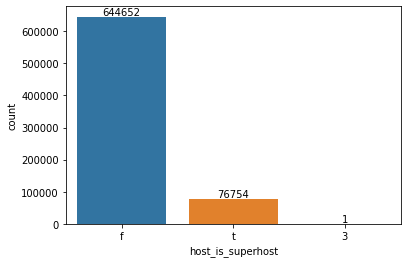

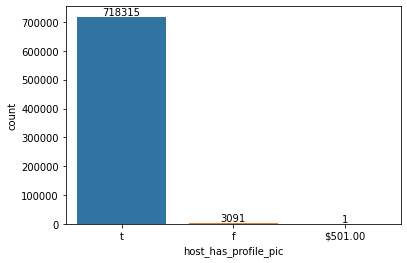

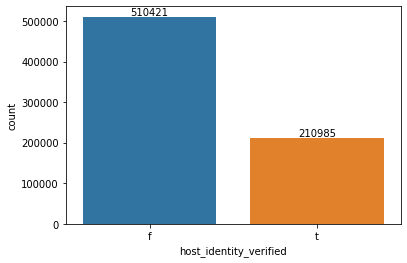

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt

for column in ['host_is_superhost','host_has_profile_pic', 'host_identity_verified' ]:
    ax = sns.countplot(x=column,data=df)
    
    abs_values = df[column].value_counts(ascending=False).values

    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.show()
    
#observations
# host_has_profile_pic near zero variance. remove?

In [51]:
df.loc[df['host_has_profile_pic'] == '$501.00']

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
78082,NaN,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/7056870/profi...,https://a0.muscache.com/im/users/7056870/profi...,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
